# **1. Introducción**

La funcionalidad a implementar en este cuaderno consiste en realizar un tratamiento sobre una imagen. En este proyecto vamos a implementar un algoritmo que, dado un angulo indicado por parámetro, dé como resultante, la imagen rotada en la posición indicada por teclado en pantalla. Para ello, vamos a crear una matriz transformación y aplicarla sobre cada píxel de la imagen, para obtener como resultante, la imagen rotada respecto de su centro.

# **2. Armado del ambiente**
**2.1 Parámetros de entrada**

Se toma la dirección de una imagen que se encuentra de manera pública, en este caso, de nuestro repositorio en github.

In [ ]:

url_img = "https://github.com/adrianmorel/SOA-TPN2-Morel-Sanchez/blob/main/HPC/images/imagen1.jpg?raw=true"
#url_img = "https://github.com/adrianmorel/SOA-TPN2-Morel-Sanchez/blob/main/HPC/images/imagen2.jpg?raw=true"
!wget {url_img} -O imagen.jpg
print("Indique cantidad de grados de giro de la imagen: ")

while True:
  try:
    grados = float(input(u"Por favor ingrese un número: "))
  except ValueError:
    print("\nValor no válido, debe ser un decimal. Intente nuevamente...\n")
    continue
  if (grados <0 or grados >360):
    print(f"\nDebería ser un valor entre mayor o igual a 0 y menor o igual que 360\n")
    continue
  break

print(f"\nSe ha solicitado el giro de la imagen a {grados}°\n")

--2021-07-05 00:15:01--  https://github.com/adrianmorel/SOA-TPN2-Morel-Sanchez/blob/main/HPC/images/imagen1.jpg?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/adrianmorel/SOA-TPN2-Morel-Sanchez/raw/main/HPC/images/imagen1.jpg [following]
--2021-07-05 00:15:02--  https://github.com/adrianmorel/SOA-TPN2-Morel-Sanchez/raw/main/HPC/images/imagen1.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/adrianmorel/SOA-TPN2-Morel-Sanchez/main/HPC/images/imagen1.jpg [following]
--2021-07-05 00:15:02--  https://raw.githubusercontent.com/adrianmorel/SOA-TPN2-Morel-Sanchez/main/HPC/images/imagen1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubus

**2.2 Instalación del módulo CUDA de Python**

In [ ]:
!pip install pycuda

     |████████████████████████████████| 1.7MB 8.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 12.0MB/s 
     |████████████████████████████████| 71kB 11.3MB/s 
  Created wheel for pycuda: filename=pycuda-2021.1-cp37-cp37m-linux_x86_64.whl size=627583 sha256=c1cc006ae1622f1dc6d30794a984e0eb5b8a6e56b923cd021b4973c9787b8b8a
  Stored in directory: /root/.cache/pip/wheels/d5/55/64/fd4dddcc5f1c25eebd90b5291c3769101dc978c70165685512
Successfully built pycuda
  Created wheel for pytools: filename=pytools-2021.2.7-py2.py3-none-any.whl size=60644 sha256=4fef7009b6e48bb9fc7ca20b1b7e56af93ce88f0f87fb43a744df18196de0b99
  Stored in directory: /root/.cache/pip/wheels/a0/b5/e5/e65d25997fd77729b9aa214645add18688483e48bbcbab6ffc
Successfully built pytools


# **3. Desarrollo CPU**

Imagen Original: [1920, 1080]
Ángulo de rotación: 23.47°
Tiempo total de ejecución en CPU:  27117.362 [ms]


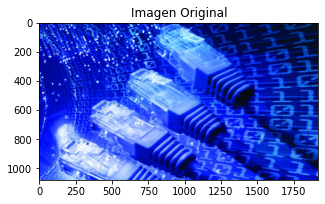

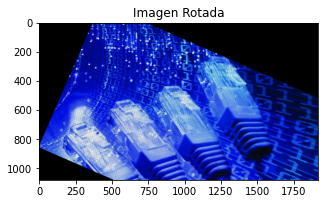

In [ ]:
#imports
import matplotlib.pyplot as plt  
import numpy as np  
import string
import math
from datetime import datetime
# --------------------------------------------
# Definición de función que transforma el tiempo en  milisegundos 
tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0
tiempo_total = datetime.now()

#leemos e imprimimos la imagen de entrada
img = plt.imread('imagen.jpg')  
y_alto, x_ancho, dim = img.shape
plt.figure(figsize=(5, 5)) 
plt.title("Imagen Original")
plt.imshow(img)

#obtenemos las coordenadas x,y del centro
x_centro = x_ancho / 2 
y_centro = y_alto / 2

#almacenamos el angulo de rotación indicado por parámetro
angulo_rotacion = float(grados)

# creamos la matriz de rotación  
gradosRad = math.radians(angulo_rotacion)
seno = np.sin(gradosRad) 
coseno = np.cos(gradosRad)

M_rotacion = np.array([  [coseno,  seno, x_centro - x_centro * coseno - y_centro * seno],
                         [-seno, coseno, y_centro + x_centro * seno - y_centro * coseno],
                         [0    ,     0 ,             1]  ])

# creamos el array resultante 
img_transformed = np.empty((y_alto, x_ancho, dim), dtype=np.uint8)

#aplicamos la matriz transformación sobre cada pixel para obtener
#las nuevas coordenadas de rotación
for y in range(0, y_alto):
  for x in range(0, x_ancho):
    pixel_data = img[y, x, :]
    input_coords = np.array([y, x, 1])
    y_res, x_res, _ = M_rotacion @ input_coords
    np.rint(x_res)
    np.rint(y_res)
    x_res_int = int(x_res)
    y_res_int = int(y_res)
    if y_res_int in range(0, y_alto) and x_res_int in range(0, x_ancho):
          img_transformed[y_res_int, x_res_int, :] = pixel_data

#imprimimos por pantalla la imagen rotada
plt.figure(figsize=(5, 5))
plt.title("Imagen Rotada") 
plt.imshow(img_transformed) 

#informamos el trabajo realizado
print("Imagen Original: "+ "[" + str(x_ancho) + ", " + str(y_alto) + "]" ) 
print("Ángulo de rotación: " + str(angulo_rotacion) + "°") 
tiempo_total = datetime.now() - tiempo_total
print("Tiempo total de ejecución en CPU: ", tiempo_en_ms( tiempo_total ), "[ms]") 


# **4. Desarrollo GPU**

Thread: [ 17 , 30  ], Bloque : [ 113 , 36 ]
Total de Thread: [ 1921 , 1080  ]  =  2074680
Imagen Original: imagen.jpg -RGB- [1920, 1080]
Ángulo de rotación: 70.0°
Tiempo total de ejecución en GPU:  188.321 [ms]


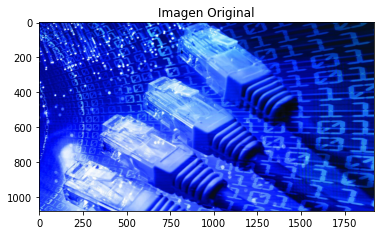

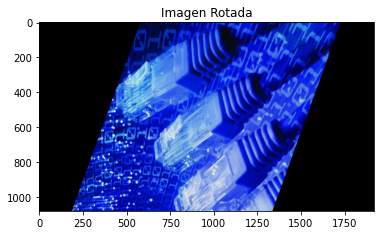

In [ ]:
%matplotlib inline
from datetime import datetime
import matplotlib.pyplot as plt
import numpy
from PIL import Image 
import pycuda.driver as cuda
import pycuda.autoinit
from pycuda.compiler import SourceModule

# --------------------------------------------
# Definición de función que transforma el tiempo en  milisegundos 
tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0

img_nombre = 'imagen.jpg'
image = Image.open( img_nombre ) 
  
# summarize some details about the image 
img_ancho, img_alto  = image.size 

# Convierto la imagen comprimida en JPEG/PNG a array
img_O_cpu = numpy.asarray(image)
img_O_cpu = img_O_cpu.astype( numpy.int32() )
img_R_cpu = numpy.empty_like( img_O_cpu)

#pinto de negro toda la imagen resultado antes de ejecutar el algoritmo
for y in range(0, img_alto):
   for x in range(0, img_ancho):
    pixel_R, pixel_G, pixel_B = img_R_cpu[y][x]
    img_R_cpu[y][x] = [0, 0, 0]
tiempo_total = datetime.now()
# Reservo los 2 vectores en GPU(3 pixeles usa RGB * (el tamaño del array))
img_O_gpu = cuda.mem_alloc( img_O_cpu.nbytes )
img_R_gpu = cuda.mem_alloc( img_R_cpu.nbytes)

# GPU - Copio la memoria al GPU.
cuda.memcpy_htod( img_O_gpu, img_O_cpu )
cuda.memcpy_htod( img_R_gpu, img_R_cpu )

# CPU - Defino la función kernel que ejecutará en GPU.
module = SourceModule("""
#include <math.h>
#define PI 3.14159265358979323846

__global__ void kernel_rot_img( int ancho, int alto, float grados, int *img_O, int *img_R )
{
  //obtenemos las coordenadas x,y del centro
  float x_centro = ancho/2; 
  float y_centro = alto/2;

  //calculamos los valores de la matriz rotacion
  float seno = sin(grados * PI / 180); 
  float coseno = cos(grados * PI / 180);
  float matriz_rotacion[3][3] ={ { coseno,   seno, x_centro - x_centro * coseno - y_centro * seno},
                                 {  -seno, coseno, y_centro + x_centro * seno - y_centro * coseno},
                                 {      0,      0,                                              1} };
  
  // Calculo las coordenadas del Thread en dos dimensiones.
  int idx = threadIdx.x + blockIdx.x*blockDim.x;
  int idy = threadIdx.y + blockIdx.y*blockDim.y;

  int tam_max = ancho*alto*3;

  // Verifico que los Thread, esten dentro de las dimensiones de la imagen.
  if( idx < ancho && idy < alto )
  {

    int x_res_int = (int) (coseno * idx + seno * idy + (x_centro - x_centro * coseno - y_centro * seno)*1);
    int y_res_int = (int) (-seno * idx + coseno * idy + (y_centro + x_centro * seno - y_centro * coseno)*1);

    int pos_vector = ((x_res_int+(y_res_int*ancho))*3);

    if( (pos_vector > -1 && pos_vector < tam_max-1) && 
         x_res_int < ancho && x_res_int > -1 &&
          y_res_int > -1 && y_res_int < alto)
    {
        img_R[(x_res_int+(y_res_int*ancho))*3  ] = img_O[(idx+(idy*ancho))*3  ];
        img_R[(x_res_int+(y_res_int*ancho))*3+1] = img_O[(idx+(idy*ancho))*3+1];
        img_R[(x_res_int+(y_res_int*ancho))*3+2] = img_O[(idx+(idy*ancho))*3+2];
    }

  }
}
""")

# CPU - Genero la función kernel.
kernel = module.get_function("kernel_rot_img")

dim_hilo_x = 17
dim_bloque_x = numpy.int( (img_ancho+dim_hilo_x-1) / dim_hilo_x )

dim_hilo_y = 30
dim_bloque_y = numpy.int( (img_alto+dim_hilo_y-1) / dim_hilo_y )

print( "Thread: [", dim_hilo_x, ",", dim_hilo_y, " ], Bloque : [", dim_bloque_x, ",", dim_bloque_y, "]" )
print( "Total de Thread: [", dim_hilo_x*dim_bloque_x, ",", dim_hilo_y*dim_bloque_y, " ]", " = ", dim_hilo_x*dim_bloque_x*dim_hilo_y*dim_bloque_y )

tiempo_img = datetime.now()
angulo_rotacion = float(grados)
kernel( numpy.int32(img_ancho), numpy.int32(img_alto), numpy.float32(grados), img_O_gpu, img_R_gpu, block=( dim_hilo_x, dim_hilo_y, 1 ), grid=(dim_bloque_x, dim_bloque_y,1) )

# GPU - Copio el resultado desde la memoria GPU.
cuda.memcpy_dtoh( img_R_cpu, img_R_gpu )

# Muestro la imagen original.
plt.figure()
plt.title("Imagen Original")
imgplot=plt.imshow( img_O_cpu )

# Muestro la imagen luego de aplicarle la matriz transformacion.
plt.figure()
plt.title("Imagen Rotada")
imgplot=plt.imshow( img_R_cpu )

#informamos el trabajo realizado
print("Imagen Original: " + img_nombre + " -" + image.mode + "- [" + str(img_ancho) + ", " + str(img_alto ) + "]" ) 
print("Ángulo de rotación: " + str(angulo_rotacion) + "°") 
tiempo_total = datetime.now() - tiempo_total
print("Tiempo total de ejecución en GPU: ", tiempo_en_ms( tiempo_total ), "[ms]") 


# **5. Métricas**

Tiempo total de ejecución en CPU (en promedio):  27117.362 [ms]

Tiempo total de ejecución en GPU (en promedio):  194.922 [ms]

***Métricas basadas en una imágen Full HD.***




# **6. Conclusiones**

Luego de aplicar el algoritmo en ambos entornos, podemos ver con los tiempos de ejecución que utilizando programación paralela se obtiene mejores tiempos de respuesta que utilizando programación secuencial. Notamos que utlizando la CPU, los tiempos varían dependiendo de la calidad de la imagen a procesar y son significativamente más altos comparados a los que se obersvan si utilizamos la GPU. De esta manera, utilizando la tarjeta gráfica, la cual posee otra arquitectura, permite disminuir considerablemente la complejidad computacional del algoritmo.

# **7. Bibliografía**

[1] Transformaciones afines con Python [`WEB`](https://www.instintoprogramador.com.mx/2019/06/transformaciones-de-imagen-afines-en.html)

[2] Introducción a numpy [`WEB`](https://numpy.org/doc/stable/user/quickstart.html)

[3] Rotaciones de imágenes [`PDF`](https://www.cs.buap.mx/~iolmos/pdi/Sesion11_OpGeometricas2.pdf)

[4] Transformaciones geométricas e interpolación [`PDF`](https://dis.um.es/~ginesgm/files/doc/pav/tema4.pdf)
